<a href="https://colab.research.google.com/github/CourtneyBrookes/ProblemSet2/blob/main/Problem2Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Load RGB image from URL, Resize image, Show grayscale copy**

Shape of the grayscale image: (224, 224)


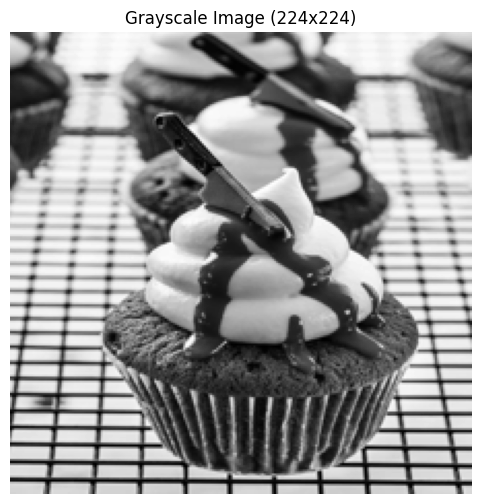

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import requests
from PIL import Image
from io import BytesIO

# Load the image from the URL
url = "https://www.jocooks.com/wp-content/uploads/2017/10/halloween-red-velvet-cupcakes-1.jpg"
response = requests.get(url)
img = Image.open(BytesIO(response.content))

# Resize the image to 224x224 pixels
new_size = (224, 224)
img = img.resize(new_size)

# Convert to grayscale
img_gray = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2GRAY)

# Show the shape of the grayscale image
print("Shape of the grayscale image:", img_gray.shape)

# Plot the resized and converted grayscale image
plt.figure(figsize=(6, 6))
plt.imshow(img_gray, cmap='gray')
plt.axis('off')
plt.title('Grayscale Image (224x224)')
plt.show()


**Convolve with 10 random filters and show filters and features maps for each**

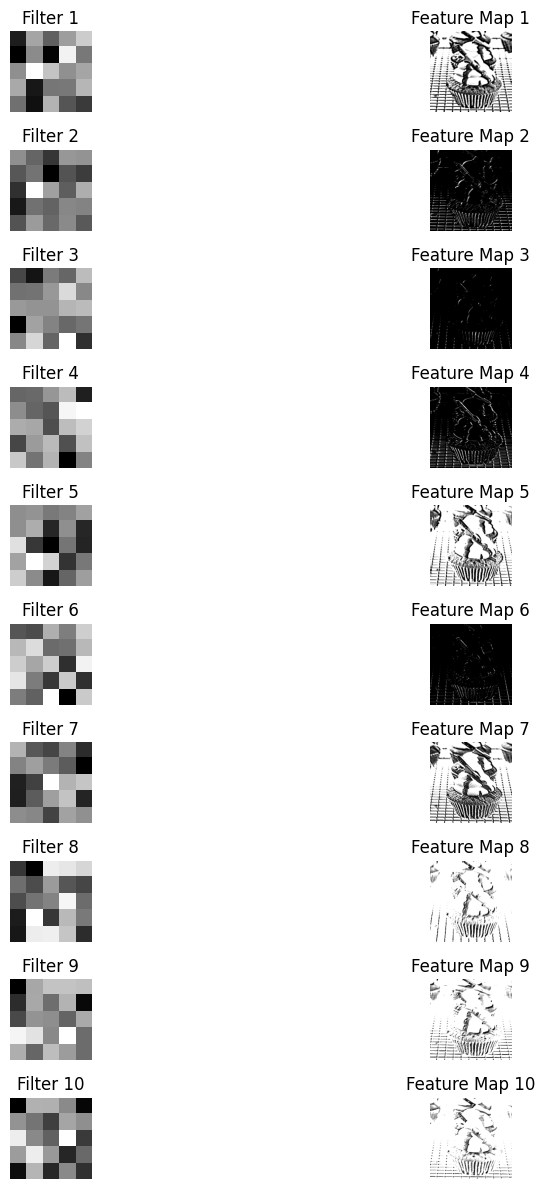

In [4]:
# Function to generate random filters
def generate_random_filters(num_filters, filter_size):
    filters = []
    for _ in range(num_filters):
        rand_filter = np.random.randn(filter_size, filter_size)
        filters.append(rand_filter)
    return filters

# Generate 10 random 5x5 filters (adjust filter_size as needed)
num_filters = 10
filter_size = 5
filters = generate_random_filters(num_filters, filter_size)

# Convolve the image with each filter and plot
plt.figure(figsize=(12, 12))

for i, filter in enumerate(filters):
    feature_map = cv2.filter2D(img_gray, -1, filter)

    # Plot the filter
    plt.subplot(num_filters, 2, i * 2 + 1)
    plt.imshow(filter, cmap='gray')
    plt.axis('off')
    plt.title(f'Filter {i + 1}')

    # Plot the corresponding feature map
    plt.subplot(num_filters, 2, i * 2 + 2)
    plt.imshow(feature_map, cmap='gray')
    plt.axis('off')
    plt.title(f'Feature Map {i + 1}')

plt.tight_layout()
plt.show()